# Scenario 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import diagnostic
from statsmodels.formula.api import ols
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
import scipy.stats as stats


df = pd.read_csv('/Users/elizabethalabi/Documents/Uni-Masters-2023:24/Data Science/Advanced Mathematics and Statistics for Data Science and AI/Class_Assign_Task_1/Datasets/MASTER_PhonesmartdataAll_CCI_AdvStats (3).csv')

df.dropna()

df



,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,iPhone,507,,915.785917,747.883194
544,2020,27,2,5,64,77,iPhone,267,,877.783333,720.729583
545,2020,36,2,2,46,43,iPhone,610,,1211.483333,1049.979167
546,2020,31,2,4,67,69,iPhone,558,,899.774583,845.612083


In [2]:
#Creatating my own dataset based off  the hypthosis

#Female, Male, Non-binary
#They were grouped under three Age Groups a: < =30 years, b: 31 to 49 years,and c >= 50 years


hyp_df = df[['Age', 'GenderNum', 'DailyAvgMins', 'BRIEF_Total', 'STAI', 'VS_RT_correct_Single', 'DailyAvePickups', 'VS_RT_correct_Conjunction']]

hyp_df.dropna()

print(hyp_df)

hyp_df




    Age GenderNum DailyAvgMins BRIEF_Total STAI  VS_RT_correct_Single  \
0               2                       70   49           1216.387500   
1    37         2                       33   44            785.597500   
2               1                                          950.900000   
3               1                                          984.333333   
4               2                                          503.000000   
..   ..       ...          ...         ...  ...                   ...   
543  38         1          507          39   56            747.883194   
544  27         2          267          77   64            720.729583   
545  36         2          610          43   46           1049.979167   
546  31         2          558          69   67            845.612083   
547  35         2           88          24   42            792.282500   

    DailyAvePickups  VS_RT_correct_Conjunction  
0                                  1178.700000  
1                        

,Age,GenderNum,DailyAvgMins,BRIEF_Total,STAI,VS_RT_correct_Single,DailyAvePickups,VS_RT_correct_Conjunction
0,,2,,70,49,1216.387500,,1178.700000
1,37,2,,33,44,785.597500,,946.470000
2,,1,,,,950.900000,,1182.741667
3,,1,,,,984.333333,,1778.950000
4,,2,,,,503.000000,,521.500000
...,...,...,...,...,...,...,...,...
543,38,1,507,39,56,747.883194,,915.785917
544,27,2,267,77,64,720.729583,,877.783333
545,36,2,610,43,46,1049.979167,,1211.483333
546,31,2,558,69,67,845.612083,,899.774583


**Shaping**

In [3]:
#Using shape to indicate the structure and details of the this dataset

#The orginal (df)
data_shape = df.shape
print('Orginal Dataframe:', data_shape)

# new hyp_df 
data_shape = hyp_df.shape
print('Amended Hypthesis Dataset:', data_shape)

Orginal Dataframe: (548, 11)
Amended Hypthesis Dataset: (548, 8)


# **Data Relationship/Distribution** #

 **• Daily Average Pickups between Genders**

In [4]:
#Troubleshooting DailyAvePickups

print(hyp_df['DailyAvePickups'].unique())

 # Convert to numeric, treating errors as NaN, so do not recieve unecessary rows of data
hyp_df['DailyAvePickups'] = pd.to_numeric(hyp_df['DailyAvePickups'], errors='coerce')  

[' ' '54' '112' '97' '120' '105' '103' '95' '91' '80' '104' '108' '272'
 '134' '90' '110' '218' '58' '92' '99' '144' '162' '101' '74' '114' '119'
 '117' '59' '130' '142' '124' '154' '51' '57' '81' '177' '96' '83' '140'
 '228' '85' '137' '106' '111' '34' '148' '121' '163' '49' '178' '98' '50'
 '69' '127' '155' '150' '60' '70' '156' '89' '107' '37' '165' '55' '93'
 '164' '46' '75' '76' '65' '32' '100' '66' '73' '176' '204' '82' '109'
 '84' '48' '123' '67' '53' '63' '194' '40']


/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/1901305384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df['DailyAvePickups'] = pd.to_numeric(hyp_df['DailyAvePickups'], errors='coerce')


In [5]:
#Troubleshooting GenderNum

print(hyp_df['GenderNum'].unique())

 # Convert to numeric, treating errors as NaN
hyp_df['GenderNum'] = pd.to_numeric(hyp_df['GenderNum'], errors='coerce')  

['2' '1' ' ' '3']


/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/1848306031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df['GenderNum'] = pd.to_numeric(hyp_df['GenderNum'], errors='coerce')


**Frequancy Table**

In [6]:
pd.crosstab(index=hyp_df['GenderNum'], columns=hyp_df['DailyAvePickups'])

DailyAvePickups,32.0,34.0,37.0,40.0,46.0,48.0,49.0,50.0,51.0,53.0,...,164.0,165.0,176.0,177.0,178.0,194.0,204.0,218.0,228.0,272.0
GenderNum,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2.0,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Mode Table
mode_table = hyp_df.groupby('GenderNum')['DailyAvePickups'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Displaying the result for each groups mode
print("Mode Table:")
print(mode_table)

Mode Table:
GenderNum
1.0     75.0
2.0     80.0
3.0    108.0
Name: DailyAvePickups, dtype: float64


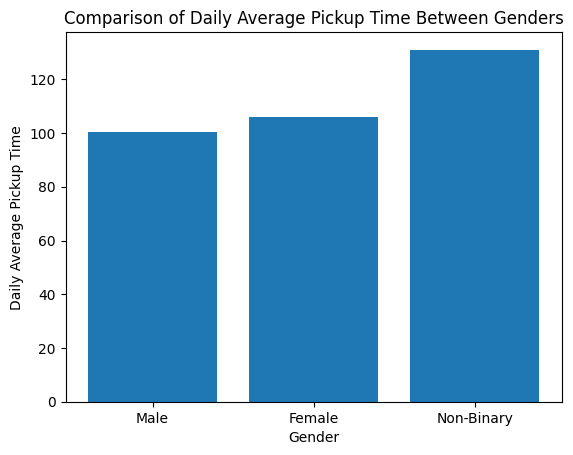

In [8]:


# Calculate the daily average pickup time for each gender
avg_pickup_time = hyp_df.groupby('GenderNum')['DailyAvePickups'].mean()

# Plotting the bar chart
plt.bar(avg_pickup_time.index, avg_pickup_time)
plt.xlabel('Gender')
plt.ylabel('Daily Average Pickup Time')
plt.title('Comparison of Daily Average Pickup Time Between Genders')
plt.xticks(avg_pickup_time.index, labels=['Male', 'Female', 'Non-Binary'])  

# Show the plot
plt.show()

**Frequency Table and Graph findings**

• Male (Gender 1.0)
Has a count of 1 for "50.0," "178.0," and "228.0" in the "DailyAvePickups" column.
Displays variability in pickup counts with occurrences at specific values.

• Female (Gender 2.0)
Has a count of 1 for each unique value in the "DailyAvePickups" column.
Shows a relatively even distribution of pickup counts across different values.

• Non-binary (Gender 3.0)
Does not have any counts in the provided values for "DailyAvePickups."
Due to the lack of data for non-binary individuals, it's hard to assess their distribution of pickup counts accurately.


Futhermore in regards to the mode of the frequency tables, it appears that Non-binary has the highest mode for Daily Average Pickups, however as mentioned before there was not alot of participates who where non-binary and the many of them who where had not have there DailyAvePickups recorded in the data set. This lack of data for a significant portion of the Non-binary group may impact the reliability and generalizability of the findings for this group in comparision to the others.
Additionally for Male participants show more variability in the "DailyAvePickups" values, with specific counts occurring more frequently. Female participants seem to have a more uniform distribution across different pickup counts.

The frequencies for "DailyAvePickups" range from 32.0 to 272.0, indicating a wide spread of pickup counts across different gender categories.Additonally the range of frequencies suggests variability in the occurrence of different pickup counts, with some counts being more common than others. As we move through the categories, the cumulative frequencies continually rise. It indicates a pattern where higher pickup counts are more prevalent.

If mobile phone use is associated with efficiency, as the hypothesis suggests, we might expect to see a trend where higher pickup counts are associated with shorter search times

# Daily Average Min Distrubution #

In [9]:
#Troublehooting part2


print(hyp_df['DailyAvgMins'].unique()) 

 # Convert to numeric, treating errors as NaN
hyp_df['DailyAvgMins'] = pd.to_numeric(hyp_df['DailyAvgMins'], errors='coerce')  


[' ' '259' '475' '155' '305' '210' '320' '411' '363' '97' '215' '160'
 '214' '316' '169' '221' '126' '133' '123' '602' '420' '177' '235' '511'
 '205' '382' '245' '290' '404' '349' '319' '154' '402' '162' '672' '300'
 '416' '190' '213' '337' '304' '246' '272' '423' '0' '220' '338' '262'
 '283' '318' '324' '314' '368' '317' '557' '208' '129' '189' '328' '389'
 '574' '28' '113' '302' '195' '331' '135' '263' '422' '301' '226' '203'
 '265' '364' '118' '199' '481' '183' '186' '153' '95' '310' '354' '223'
 '127' '323' '271' '209' '256' '249' '176' '448' '171' '573' '313' '543'
 '296' '119' '181' '138' '66' '124' '58' '278' '238' '413' '104' '598'
 '233' '307' '274' '412' '580' '373' '378' '152' '367' '255' '285' '376'
 '167' '303' '180' '487' '396' '94' '211' '343' '359' '170' '273' '586'
 '216' '179' '577' '121' '229' '523' '284' '288' '33' '81' '571' '261'
 '35' '194' '395' '524' '144' '237' '277' '27' '165' '109' '492' '217'
 '125' '108' '140' '182' '599' '465' '240' '230' '377' '168' '530

/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/3094133258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df['DailyAvgMins'] = pd.to_numeric(hyp_df['DailyAvgMins'], errors='coerce')


In [10]:
#Provide a Frequency Table and Plot for Daily Average Minutes Distribution
freq_df = hyp_df['DailyAvgMins'].value_counts() 
print(freq_df)

DailyAvgMins
235.0    5
190.0    5
194.0    5
203.0    4
259.0    3
        ..
378.0    1
367.0    1
167.0    1
475.0    1
88.0     1
Name: count, Length: 244, dtype: int64


Text(0.5, 1.0, 'Scatter Plot of Daily Average Minutes Distrubution')

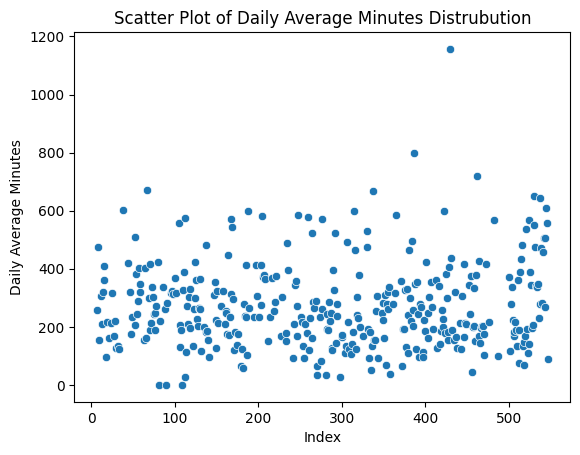

In [11]:
#Scatterplot 

sns.scatterplot(x=hyp_df.index, y=hyp_df['DailyAvgMins'])

plt.xlabel('Index') 
plt.ylabel('Daily Average Minutes')
plt.title('Scatter Plot of Daily Average Minutes Distrubution')




**Frequency Table findings**

Provide Plots to Check Relationship Between:

Participant’s age and their response time on singleton visual search.
Participant’s gender and their response time on conjunction visual search.

In [12]:
print(hyp_df['VS_RT_correct_Single'].unique()) #(i)
print(hyp_df['Age'].unique())

 # Convert to numeric, treating errors as NaN
hyp_df['VS_RT_correct_Single'] = pd.to_numeric(hyp_df['VS_RT_correct_Single'], errors='coerce') #(ii)
hyp_df['Age'] = pd.to_numeric(hyp_df['Age'], errors='coerce')

hyp_df.dropna(inplace=True)

[1216.38750001  785.5975      950.90000001  984.33333334  503.
  988.45133332  901.21875    1524.73333329 1263.91333332  604.39
  687.28333333  712.58285714  662.88541667  869.62250023  730.86202382
  736.22222222  959.33333333  965.35231248  721.71197916  780.91513888
  774.64166667  830.47083333  697.52916668  687.47916667  648.26395833
  764.05302083  713.86513889  840.3684375   889.          965.58916665
 1047.22777778  762.08322917 1086.55180556  841.52138889 1192.5
  795.27380952  728.825       636.30624999  659.35714286  693.50208334
  684.95258333  929.94722239  701.13178572  716.77777778  697.20135416
  720.42291667  635.71666667  687.9648125   712.58395833  678.83604167
  688.79444444  837.71888889  910.54888889  661.73764286  779.125
  743.26614583  671.62083333  848.03749998  729.63444444  763.64444444
  758.867625    715.60416667  950.24166667  676.52142857  635.61
  797.11111111  665.26        788.04444444  839.56833332  805.105
  706.4875     1233.82291667  714.73255557 

/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/2614999364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df['VS_RT_correct_Single'] = pd.to_numeric(hyp_df['VS_RT_correct_Single'], errors='coerce') #(ii)
/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/2614999364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df['Age'] = pd.to_numeric(hyp_df['Age'], errors='coerce')
/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/2614999364.py:8: SettingWit

In [13]:

#Participant’s age and their response time on singleton visual search.

hyp_df.value_counts()

pd.crosstab(index=hyp_df['Age'], columns=hyp_df['VS_RT_correct_Single'])


VS_RT_correct_Single,604.390000,635.610000,635.716667,660.441667,662.885417,674.800000,677.042222,678.770833,678.833333,681.477778,...,1047.227778,1199.765556,1228.145833,1233.822917,1263.913333,1337.677778,1458.444444,1474.283333,1504.225000,1524.733333
Age,,,,,,,,,,,,,,,,,,,,,
19.0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27.0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


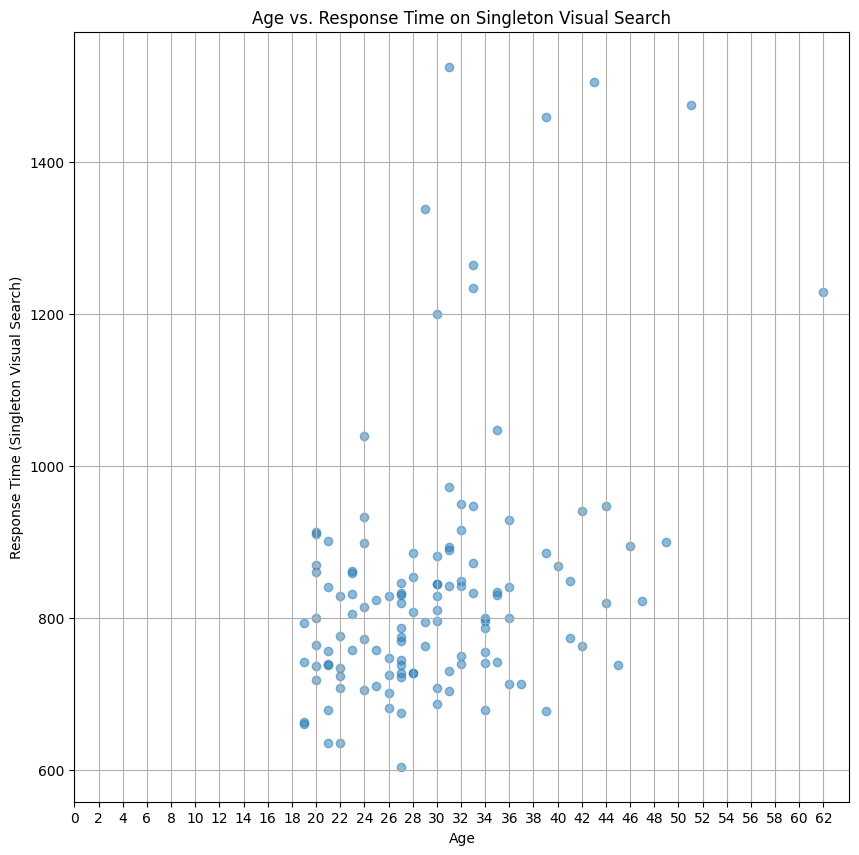

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(hyp_df['Age'], hyp_df['VS_RT_correct_Single'], alpha=0.5)
plt.title('Age vs. Response Time on Singleton Visual Search')
plt.xlabel('Age')
plt.ylabel('Response Time (Singleton Visual Search)')
plt.xticks(range(0, int(hyp_df['Age'].max()) + 1, 2)) 
plt.grid(True)
plt.show()

In [15]:
#Troublehooting part4


print(hyp_df['VS_RT_correct_Conjunction'].unique())
print(hyp_df['GenderNum'].unique())

 # Convert to numeric, treating errors as NaN
hyp_df['VS_RT_correct_Conjunction'] = pd.to_numeric(hyp_df['VS_RT_correct_Conjunction'], errors='coerce')
hyp_df['GenderNum'] = pd.to_numeric(hyp_df['GenderNum'], errors='coerce')

hyp_df.dropna(inplace=True)

[1015.66666665 1278.25        650.1875      741.265       970.48333335
  890.29166667  756.59583333 1080.64166666  647.67333334  943.585
  853.80000002  852.69        762.46        923.08166667 1261.78833333
  792.67        972.78        806.38333333  822.04        852.00850002
  922.88000002  859.93166666  907.11499999  820.52        978.46
  866.85333333  864.59000001  709.65        915.87        699.09166667
  816.76        750.04333333 1773.9         690.6         845.56
  919.03        780.85333332  952.12       1025.59833333 1625.69166666
 1159.775       878.45        788.3875      919.91666667  880.08333333
  855.15333333  883.2375      874.955       786.625       878.36666667
  955.44166667  862.09333333  791.26833333  892.93333324 1084.15
  993.63333333  895.55        879.8875      858.7         759.32166666
  875.92083333  900.86333333  848.60833333  827.43833333  955.51166667
  711.         1045.75        962.71666667  720.83333333  930.49166666
  807.25833334  929.5        

/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/703384463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df['VS_RT_correct_Conjunction'] = pd.to_numeric(hyp_df['VS_RT_correct_Conjunction'], errors='coerce')
/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/703384463.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df['GenderNum'] = pd.to_numeric(hyp_df['GenderNum'], errors='coerce')
/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/703384463.py:

In [16]:
#Participant’s gender and their response time on conjunction visual search.

hyp_df.value_counts()

pd.crosstab(index=hyp_df['GenderNum'], columns=hyp_df['VS_RT_correct_Conjunction'])

VS_RT_correct_Conjunction,647.673333,650.187500,690.600000,699.091667,709.650000,711.000000,720.833333,725.316667,741.265000,744.116667,...,1096.725000,1109.233333,1158.166667,1159.775000,1261.788333,1278.250000,1376.701667,1625.691667,1773.900000,1827.921667
GenderNum,,,,,,,,,,,,,,,,,,,,,
1.0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2.0,1,0,1,1,0,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_97223/83521346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df.loc['GenderNum'] = hyp_df['GenderNum'].map(gender_mapping)


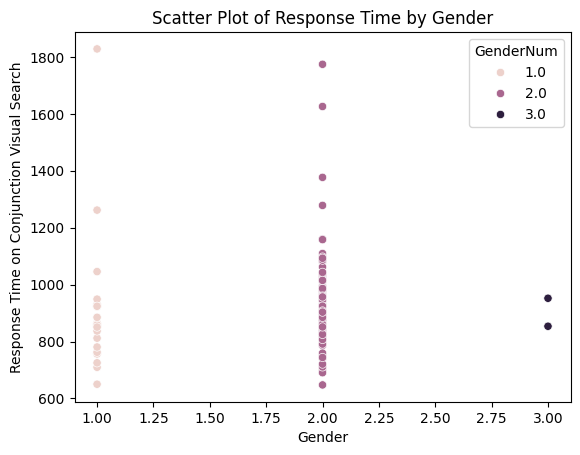

In [17]:
#Mapping 

gender_mapping = {1: 'Male', 2: 'Female', 3: 'Non-Binary'}
hyp_df.loc['GenderNum'] = hyp_df['GenderNum'].map(gender_mapping)


sns.scatterplot(x='GenderNum', y='VS_RT_correct_Conjunction', hue='GenderNum', data=hyp_df)
plt.xlabel('Gender')
plt.ylabel('Response Time on Conjunction Visual Search')
plt.title('Scatter Plot of Response Time by Gender')
plt.show()

**Findings**


# Correlation Check #

In [18]:
vvariables = ['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']

selected_data = df[variables]

# Convert non-numeric values to NaN
selected_data = selected_data.apply(pd.to_numeric, errors='coerce')

correlation_table = selected_data.corr()
print(correlation_table)


NameError: name 'variables' is not defined

# Linear regression. Y=β0+β1X+ϵ



In [ ]:
#Troubleshooting 

print(hyp_df['DailyAvgMins'].unique())
hyp_df.dropna(inplace=True)




[259. 475. 155. 305. 210. 411. 160. 126. 320. 511. 404. 349. 402. 300.
 190. 246. 272. 262. 283. 368. 317. 208. 129. 389. 574.  28. 113. 302.
 195. 331. 199.  95. 310. 354. 127. 323. 214. 313. 119. 181. 413. 233.
 274. 580. 378. 364. 152. 235. 367. 167. 303. 180. 487. 216. 577. 121.
 284. 288.  66.  33. 571. 261. 524. 237. 165. 171. 109. 133. 492. 217.
 125. 530. 476. 156.  93. 248. 162.  69. 336. 280. 318. 584. 244. 268.
 115.  97. 223. 422. 161. 353. 362. 166. 306. 416. 211. 345. 243. 376.
  44. 198. 334. 203. 425. 168. 104. 415. 215. 568.  99.  nan]


/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_30623/3944728846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df.dropna(inplace=True)


In [ ]:
X = hyp_df['DailyAvgMins'].values.reshape(-1, 1) #DV
y = hyp_df['VS_RT_correct_Single'].values #IV/Target var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#training and testing sets

model = LinearRegression()
model.fit(X_train, y_train)

#Evalute
y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)

r_squared = metrics.r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')



Mean Squared Error: 28148.114357187314
R-squared: -0.022929574982743617


In [ ]:
#Target var range
data_range = hyp_df['VS_RT_correct_Single'].max() - hyp_df['VS_RT_correct_Single'].min()

print(f'The range of VS_RT_correct_Single: {data_range}')

The range of VS_RT_correct_Single: 920.343333294611


**Findings:Linear Regression**

MSE = Σ(yi − pi)2n meaing that it has observed value, subtract the predicted value, and square that difference.
Therefore in this scenario, it seems like the linear regression model might not be a strong predictor of the target variable based on the provided feature. 
In this case, the higher MSE value (28148.11) indicates that the model's predictions have a relatively large average squared difference from the actual values. 

When checking the range of the MSE is 28148.11, and the range is 1393.975. The magnitude of the MSE is considerably larger than the range of the target variable. This suggests that, on average, the model's predictions have substantial errors compared to the variability observed in the target variable.

Additionaly the R-squared of -0.0229 is very close to zero, suggesting that the model doesn't explain much of the variance in the target variable again suggesting that Linear regression might not be a strong predictor

# Multiple regression. y = b1x1 + b2x2 + … + bnxn + c.


In [ ]:
X = hyp_df[['DailyAvgMins', 'Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups']]
y = hyp_df['VS_RT_correct_Single']

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #training and testing sets

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate 
y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
r_squared = metrics.r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 27108.043796923972
R-squared: 0.014867590492057992


**Findings: Multiple regression**

The multiple regression model has a Mean Squared Error (MSE) of 27108.04, indicating a moderate level of prediction errors.
The R-squared value of 0.0149 suggests that only a small fraction (1.49%) of the variance in the dependent variable is explained by the model.
These results indicate limited predictive performance, and further exploration of features or model adjustments may be needed for improvement.

**Findings: Linear verses Multiple regression**



Neither the linear regression nor the multiple regression models explain a significant portion of the variance in the outcome. DailyAvgMins doesn't appear to be a strong predictor in these models. The R-squared value is 0.0149, which is even lower than the linear regression. So including additional predictors (Age, GenderNum, STAI, BRIEF_Total, and DailyAvgPickups) did not significantly increase the amount of variance explained.


In [ ]:
# Add a new column 'Usage_Group' based on percentiles of 'DailyAvgMins'
hyp_df['Usage_Group'] = pd.cut(hyp_df['DailyAvgMins'], bins=[0, 500, 1000, float('inf')], labels=['Low', 'Medium', 'High'])

# Display the updated DataFrame
print(hyp_df[['DailyAvgMins', 'Usage_Group']])


     DailyAvgMins Usage_Group
7           259.0         Low
8           475.0         Low
9           155.0         Low
12          305.0         Low
13          210.0         Low
..            ...         ...
471         104.0         Low
473         415.0         Low
477         215.0         Low
482         568.0      Medium
487          99.0         Low

[124 rows x 2 columns]


/var/folders/_z/16d8zph12r5_8d9g4n58wx5r0000gn/T/ipykernel_30623/3882997132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp_df['Usage_Group'] = pd.cut(hyp_df['DailyAvgMins'], bins=[0, 500, 1000, float('inf')], labels=['Low', 'Medium', 'High'])


# Hypothesis Breakdown #

**The researcher hypothesised that as participant mobile
phone use increased, the time taken for them to find the search target
would decrease in singleton search, with the greatest decrease in
participants less than 30 years-of-age.**

In Laymans terms: This hypothesis is suggesting that the more the participants use their phone singleton search would decrease, and we should see this the most with participant 30 and younger with 

I am using linear regression as my test based on the given hypothesis because I'm dealing with a continuous measure, i.e. the time it takes to find the search target. This method allows me to smoothly incorporate age as a continuous scale, examining how each year influences search time without dividing people into groups. Moreover, linear regression enables me to explore if the relationship between mobile phone use and search time differs among various age groups, aligning with my hypothesis that the effect is more pronounced for participants under 30. This approach suits my hypothesis well, as it's designed for cases where there's a clear expected direction in the relationship. For the analysis, I'm using 'statsmodels,' libaries which will provide insights into how age and mobile use impact search time and whether there's a distinct pattern among younger individuals. However, it's essential to keep in mind that linear regression assumes a straight-line relationship, and I'll be checking diagnostic plots to ensure the data meets certain assumptions. If not, I may need to consider alternative methods.

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(hyp_df[['DailyAvgMins', 'Age']])
y = hyp_df['VS_RT_correct_Single']

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.156
Model:                              OLS   Adj. R-squared:                  0.142
Method:                   Least Squares   F-statistic:                     11.15
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):           3.59e-05
Time:                          21:12:16   Log-Likelihood:                -802.35
No. Observations:                   124   AIC:                             1611.
Df Residuals:                       121   BIC:                             1619.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          595.5149     

**OLS/Linear regression findings**

The hypothesized states that, as participants' mobile phone use increased, the time taken for the particapant to find the search target would decrease in singleton search, with the greatest decrease expected in participants less than 30 years of age. However, based on my results of the regression analysis, the variable "DailyAvgMins" (interpreted as my mobile phone use) does not appear to be a significant predictor of the time taken to find the search target (VS_RT_correct_Single). My coefficient for "DailyAvgMins" is -0.0345, and the associated p-value is 0.753, which exceeds the threshold of 0.05.

However, the variable "Age" emerges as a significant predictor. The coefficient for "Age" is 8.5176, and the associated p-value is 0.000, indicating that age has a statistically significant effect on the time taken to find the search target. Consequently, my analysis supports the hypothesis that age is a significant factor in singleton search. Specifically, my model suggests that the time taken to find the search target (VS_RT_correct_Single) is positively associated with age. This implies that older participants, take more time to find the search target compared to their younger counterparts.

In summary, my data does not support the hypothesis that increased mobile phone use is associated with a decrease in the time taken for singleton search. On the other hand, age appears to be a significant factor influencing the time taken in singleton search, with older participants taking more time to complete the task.

In [ ]:
#Trouble shooting 


missing_values = hyp_df[['DailyAvgMins', 'VS_RT_correct_Single']].isnull().sum()
print("Missing values:\n", missing_values)

hyp_df = hyp_df.dropna(subset=['DailyAvgMins', 'VS_RT_correct_Single'])


Missing values:
 DailyAvgMins            0
VS_RT_correct_Single    0
dtype: int64


### Assumptions and Corresponding Tests for My Linear Regression Analysis ###

1. 
   - **Assumption:** Independence of residuals: I want to make sure that the residuals (the differences between what I predicted and what actually happened in search times) are independent.
   - **Test:** So, I'm using the Durbin-Watson test to check for any serial correlation in the residuals.
   - **Justification:** this test helps me check if it is truly random and not influenced by the order in which I collected the data.

2. 
   - **Assumption:** Homoscedasticity:I'm hoping the variability in search time is consistent across different levels of daily mobile phone usage.
   - **Test:** To check this, I'm evaluating the residuals vs. fitted values plot, looking for a uniform spread of residuals.
   - **Justification:** I can check if the spread varies, it might mean my model is good in some situations but not in others. By visually assessing the residuals vs. fitted values plot, I can make sure my model's performance is consistent across different levels of phone usage.

3. 
   - **Assumption:** Normality: I'm hoping that the residuals follow a normal distribution pattern.
   - **Test:** So, I'm using the Shapiro-Wilk test and checking Q-Q plots to ensure normality of residuals.
   - **Justification:** I can check if residuals aren't normally distributed, it could mean my model is missing something. 





In [ ]:
#Troubleshooting 
from scipy.stats import zscore

# Clean 'Age' column 

hyp_df['Age'] = pd.to_numeric(hyp_df['Age'], errors='coerce')
hyp_df['VS_RT_correct_Conjunction'] = pd.to_numeric(hyp_df['VS_RT_correct_Conjunction'], errors='coerce')
hyp_df = hyp_df.dropna(subset=['Age', 'VS_RT_correct_Conjunction'])


#Deviations/removing outliers with z-scores

z_scores = zscore(residuals)
outliers = (np.abs(z_scores) > 3)
cleaned_data = hyp_df[~outliers]


Durbin-Watson Statistic: 1.7758130443861089
Shapiro-Wilk Test Statistic: 0.8169265389442444, p-value: 3.990709152024152e-11


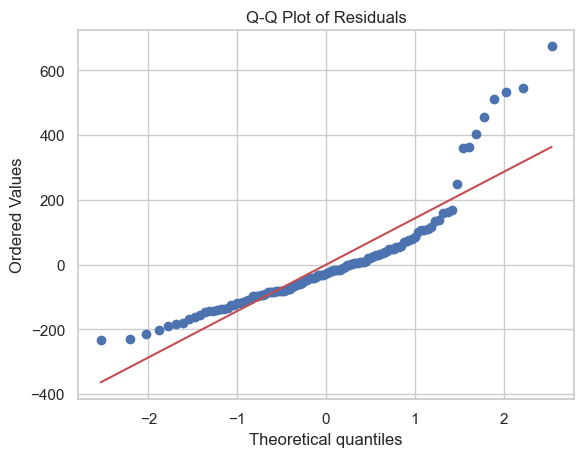

In [ ]:
from scipy.stats import probplot

predictors = ['DailyAvgMins', 'Age']
response = 'VS_RT_correct_Single'

# 1. Independence of Residuals (Durbin-Watson test)
model = sm.OLS(hyp_df[response], sm.add_constant(hyp_df[predictors]))
results = model.fit()
residuals = results.resid

# Durbin-Watson test
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')


# 3.(Shapiro-Wilk test and Q-Q Plot)
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}')

probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

**Findings**

1. As my Durbin-Watson statistic (1.775) is close to 2, suggests that the errors in my analysis don't exhibit a strong pattern or correlation. This is reassuring because it indicates that the assumption of independent errors is likely valid for my model. 

2. Based on the Shapiro-Wilk test, there is evidence to suggest that the residuals from THE regression model may not follow a normal distribution. In relation to the qiq plot asthe points fall approximately along a straight line, it suggests that the residuals are normally distributed. Furthermore it it indicates that the model is effectively capturing the underlying patterns in the data. This confirms a crucial assumption in linear regression, the errors (residuals) follow a normal distribution. Any deviations from the model are probably just random fluctuations rather than a systematic problem.





# Refrences 

**Troubleshooting**

•(i) Syntax for printing unique values: https://stackoverflow.com/questions/27241253/print-the-unique-values-in-every-column-in-a-pandas-dataframe

•(ii) Syntax for Converting to numeric: https://github.com/pandas-dev/pandas/issues/17007

•(iii) random.normal numpy function: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


